In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [24]:
df=pd.read_csv('/content/Algerian_forest_fires_dataset.csv')

In [25]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,6,6,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,7,6,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,8,6,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,6,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [27]:
df.isnull().sum()

,0
day,1
month,2
year,2
Temperature,2
RH,2
Ws,2
Rain,2
FFMC,2
DMC,2
DC,2


In [28]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [29]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1
df.head(127)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [31]:
df[['Region']]=df[['Region']].astype(int)

In [32]:
df=df.dropna().reset_index(drop=True)

In [33]:
df.isnull().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [34]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      244 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [12]:
# Filter the DataFrame to show rows where the 'day' column contains the string 'day'
rows_with_day_string = df[df['day'] == 'day']

# Display the filtered rows
print("Rows containing 'day' in the 'day' column:")
print(rows_with_day_string)

Rows containing 'day' in the 'day' column:
     day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI  \
124  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI   

     FWI  Classes    Region  
124  FWI  Classes         1  


In [13]:
df=df.drop(122).reset_index(drop=True)

In [14]:
# Filter the DataFrame to show rows where the 'day' column contains the string 'day'
rows_with_day_string = df[df['day'] == 'day']

# Display the filtered rows
print("Rows containing 'day' in the 'day' column:")
print(rows_with_day_string)


Rows containing 'day' in the 'day' column:
     day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI  \
123  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI   

     FWI  Classes    Region  
123  FWI  Classes         1  


In [39]:
# Filter the DataFrame to show rows where the 'day' column contains the string 'day'
rows_with_day_string = df[df['day'] == 'day']

# Display the filtered rows
print("Rows containing 'day' in the 'day' column after dropping 122 and resetting index:")
print(rows_with_day_string)

# If there are still rows with 'day' in the 'day' column, drop them.
# Assuming the previous drop of index 122 was the intended problematic row,
# we can filter and drop any remaining rows where 'day' is 'day'.
# We use the index of the rows found in the previous step to drop them.
if not rows_with_day_string.empty:
    df = df.drop(rows_with_day_string.index).reset_index(drop=True)
    print(f"Dropped {len(rows_with_day_string)} additional row(s) containing 'day' in the 'day' column.")

# Now, attempt the type conversion after ensuring the problematic values are removed.
df[['day', 'month', 'year', 'Temperature', ' RH', ' Ws']] = df[['day', 'month', 'year', 'Temperature', ' RH', ' Ws']].astype(int)

# Check info to confirm the change
df.info()

Rows containing 'day' in the 'day' column after dropping 122 and resetting index:
     day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI  \
122  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC  DC  ISI  BUI   

     FWI  Classes    Region  
122  FWI  Classes         1  
Dropped 1 additional row(s) containing 'day' in the 'day' column.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4    RH          243 non-null    int64 
 5    Ws          243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4    RH          243 non-null    int64 
 5    Ws          243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [41]:
objects=[feature for feature in df.columns if df[feature].dtype=='O']
objects

['Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ']

In [42]:
for i in objects:
  if i!='Classes  ':
    df[i]=df[i].astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [43]:
df.to_csv("/content/Algerian_forest_fires_dataset_update.csv",index=False)

In [44]:
df_copy=df.drop(['day','month','year'],axis=1)

In [45]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [46]:
df_copy['Classes  '].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [47]:
df_copy['Classes  ']=np.where(df_copy['Classes  '].str.contains('not fire'),0,1)

In [48]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [49]:
df_copy['Classes  '].value_counts()

,count
Classes,
1,137
0,106


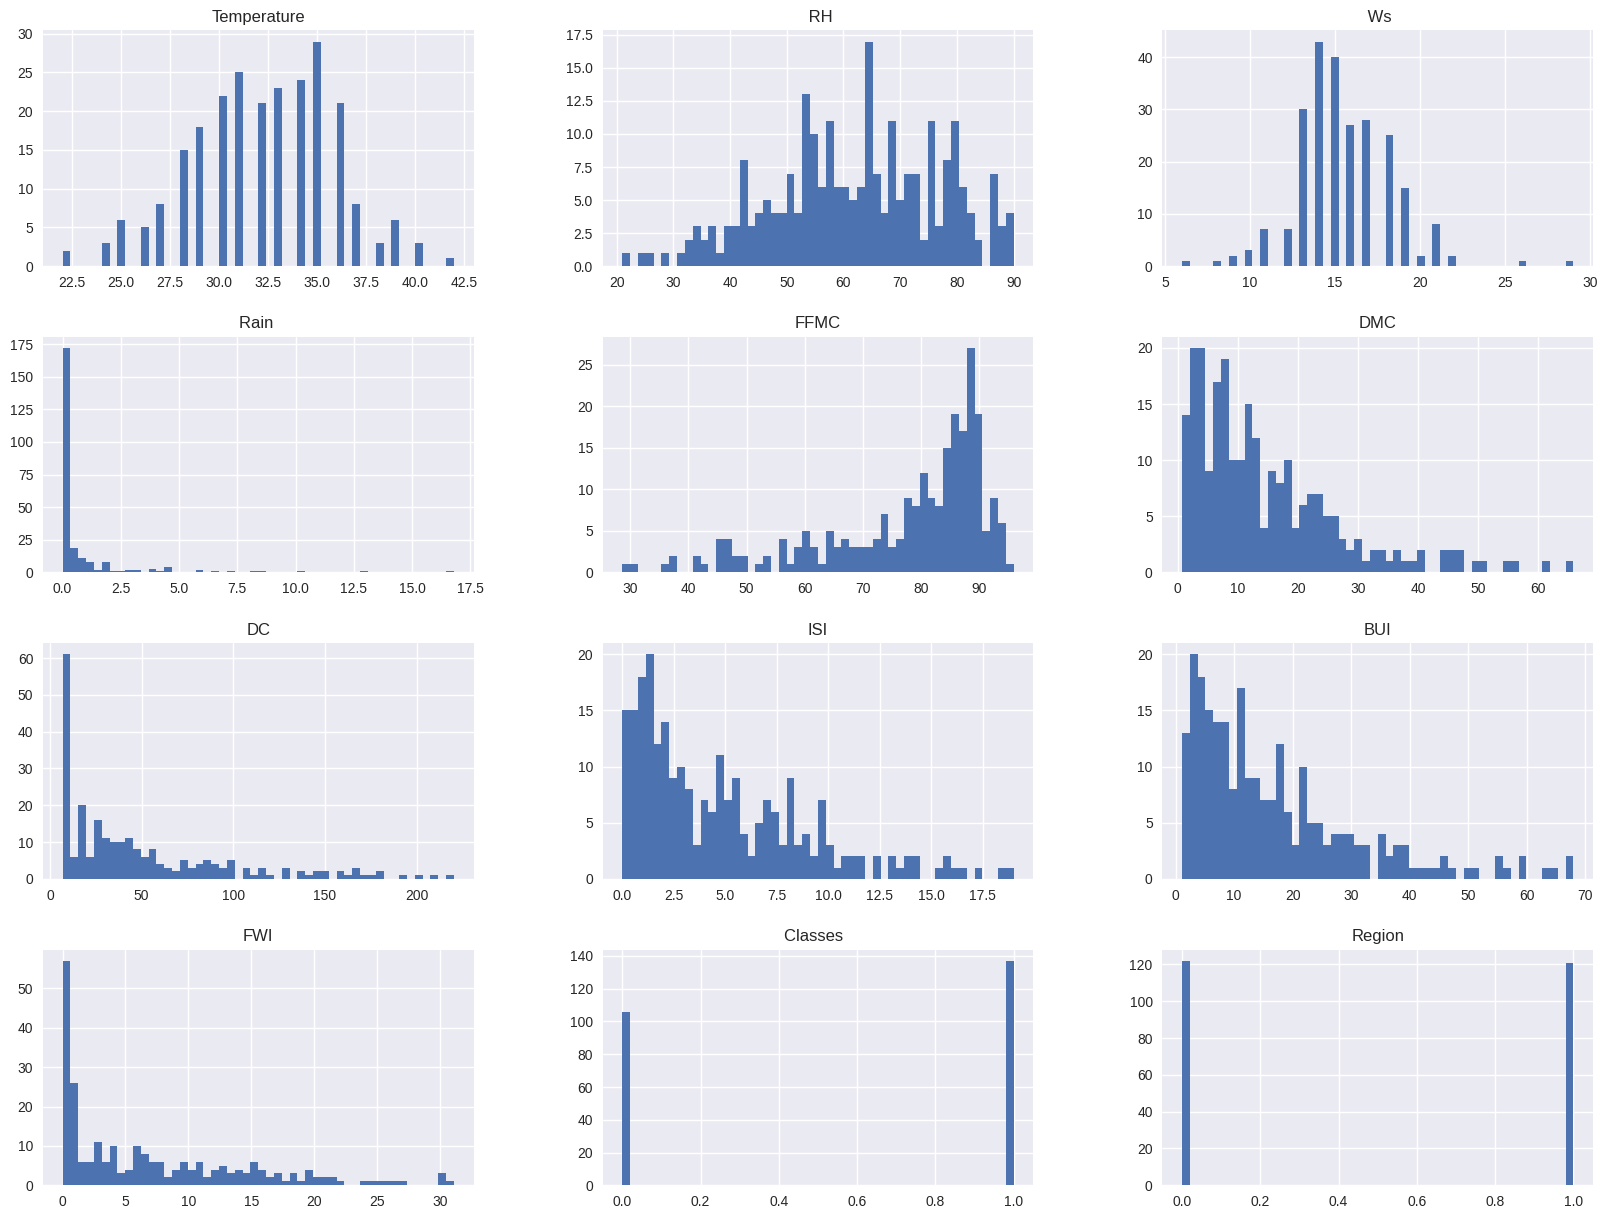

In [50]:
plt.style.use('seaborn-v0_8') # Changed 'seaborn' to 'seaborn-v0_8'
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [51]:
percentage=df_copy['Classes  '].value_counts(normalize=True)*100

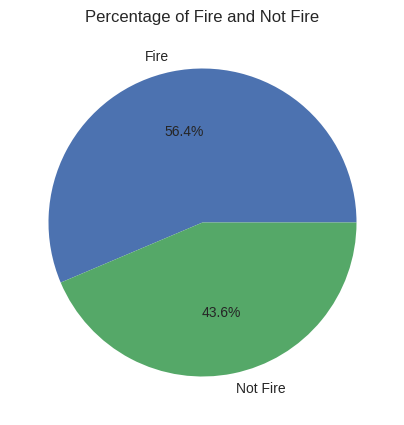

In [52]:
classlabels=['Fire','Not Fire']
plt.figure(figsize=(5,5))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title('Percentage of Fire and Not Fire')
plt.show()

In [53]:
X=df_copy.drop("FWI",axis=1)
y=df_copy["FWI"]

In [54]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [55]:
y.head()

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5


In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
115,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0,0
207,33,37,16,0.0,92.2,61.3,167.2,13.1,64.0,1,1
158,38,43,13,0.5,85.0,13.0,35.4,4.1,13.7,1,1
132,31,42,21,0.0,90.6,18.2,30.5,13.4,18.0,1,1
84,34,64,14,0.0,88.9,40.5,171.3,9.0,50.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0
179,34,59,16,0.0,88.1,19.5,47.2,7.4,19.5,1,1


In [58]:
#feature scaling or standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [59]:
X_train

array([[-0.87563202,  0.21321832,  1.28577038, ..., -0.76790976,
        -1.14434427, -1.01036297],
       [ 0.22209084, -1.65484925,  0.14504117, ...,  3.10086694,
         0.8738629 ,  0.98974332],
       [ 1.5942444 , -1.25454906, -0.99568804, ..., -0.24276653,
         0.8738629 ,  0.98974332],
       ...,
       [-1.97335488,  0.947102  ,  0.52528424, ..., -1.03380506,
        -1.14434427, -1.01036297],
       [ 0.49652155, -0.18708188,  0.14504117, ...,  0.14278167,
         0.8738629 ,  0.98974332],
       [-0.60120131,  1.0138187 ,  2.04625653, ..., -0.99392076,
        -1.14434427, -1.01036297]])

Mean Absolute Error: 0.33231115384863824
R2 Score: 0.9890356825759857


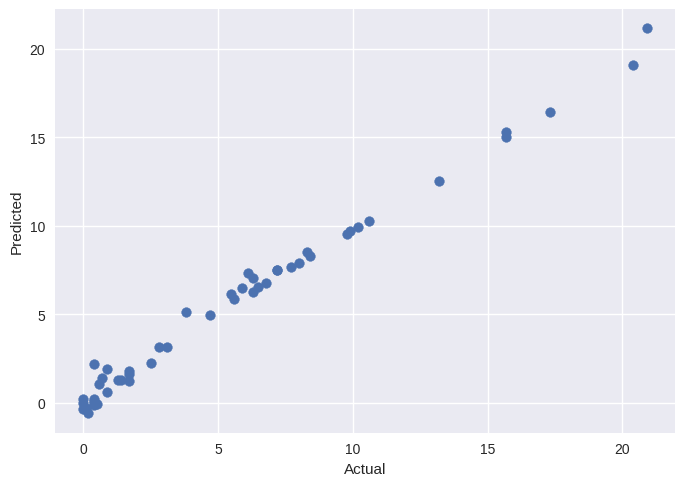

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lin=LinearRegression()
lin.fit(X_train,y_train)
y_pred=lin.predict(X_test)
mae=mean_squared_error(y_test,y_pred)
print("Mean Absolute Error:",mae)
r2=r2_score(y_test,y_pred)
print("R2 Score:",r2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Mean Absolute Error: 1.4308089977464673
R2 Score: 0.9527917018651335


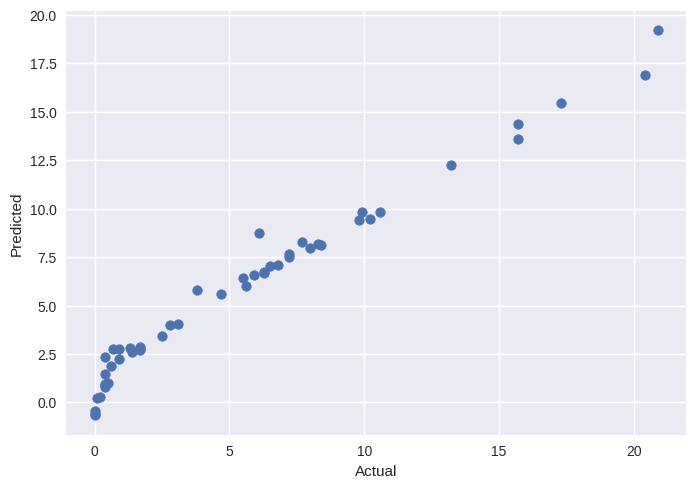

In [61]:
#Lasso
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
mae=mean_squared_error(y_test,y_pred)
print("Mean Absolute Error:",mae)
r2=r2_score(y_test,y_pred)
print("R2 Score:",r2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Mean Absolute Error: 0.4694114296442019
R2 Score: 0.9845121782477887


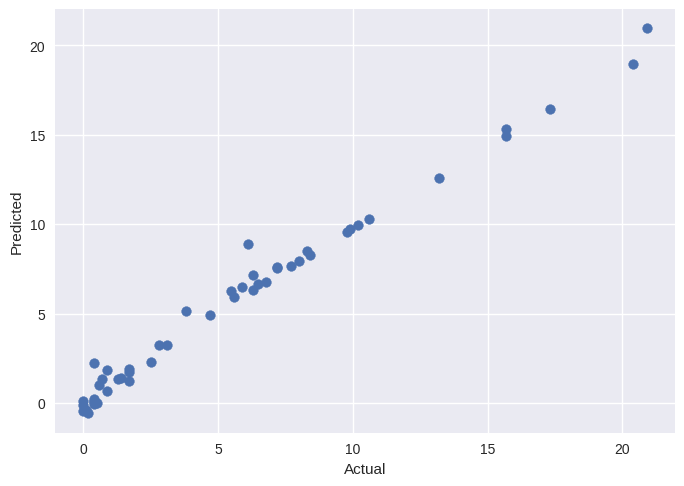

In [62]:
#ridge
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
mae=mean_squared_error(y_test,y_pred)
print("Mean Absolute Error:",mae)
r2=r2_score(y_test,y_pred)
print("R2 Score:",r2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Mean Absolute Error: 0.4694114296442019
R2 Score: 0.9845121782477887


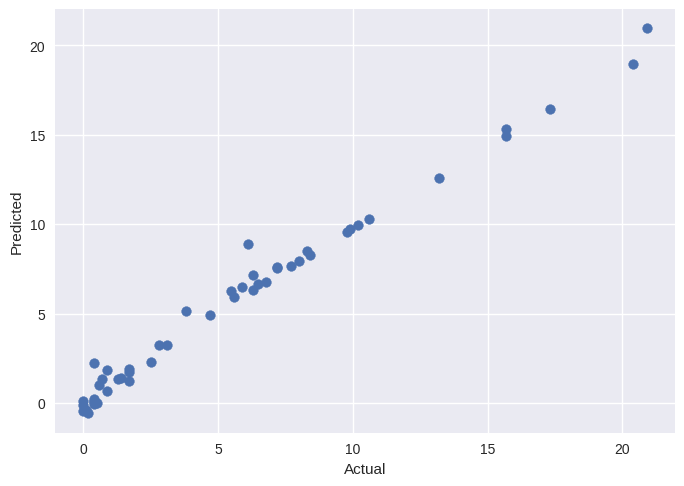

In [63]:
#elastic
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train,y_train)
elastic.score(X_test,y_test)
mae=mean_squared_error(y_test,y_pred)
print("Mean Absolute Error:",mae)
r2=r2_score(y_test,y_pred)
print("R2 Score:",r2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Mean Absolute Error: 0.4694114296442019
R2 Score: 0.9845121782477887


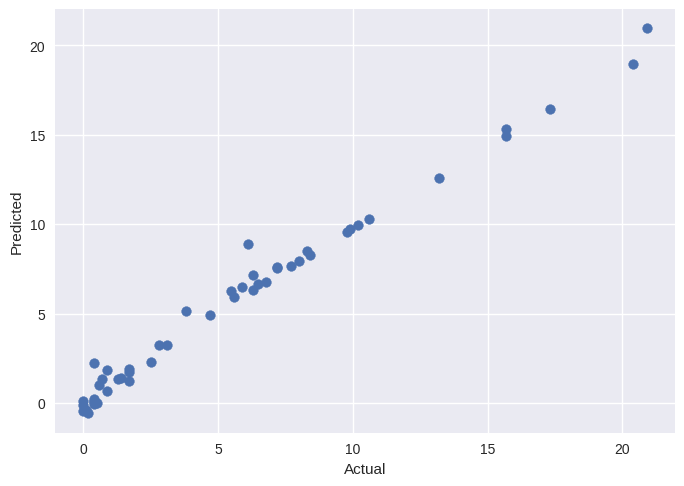

In [64]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(alphas=(0.1,1.0,10.0),cv=10,scoring='neg_mean_absolute_error')
ridgecv.fit(X_train,y_train)
ridgecv.alpha_
ridge=Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train,y_train)
ridge.score(X_train,y_train)
ridge.score(X_test,y_test)
mae=mean_squared_error(y_test,y_pred)
print("Mean Absolute Error:",mae)
r2=r2_score(y_test,y_pred)
print("R2 Score:",r2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [65]:
#pickle ml model,preprocess model
import pickle
pickle.dump(ridgecv,open('ridge.pkl','wb'))
pickle.dump(sc,open('scaling.pkl','wb'))